## 훈련과정 : R. 파이썬 기반 빅데이터 분석 전문가 양성 과정
- 교과목 평가 : 분석용 데이터 구축
- 성명 : 
- 점수 : 

# 머신러닝 프로젝트 

## 타이타닉 생존자 예측모델 개발

- 데이터 : 
  - 제공 데이터 파일 : titanic3.csv
  - 훈련/검증용 데이터 : 평가 데이터 = 8 : 2
  - 훈련/검증용 데이터로 모델 학습 및 검증하고 평가 데이터는 최종 평가에만 사용


- 모델 개발 방법 :
  - 데이터 전처리 및 탐색적 분석을 통하여 파생변수 최소 2개 이상 개발
  - 알고리즘은 최소한 3개 이상 적용(Decision Tree, Random Forest, Logistic Regression은 필수)


- 훈련 및 평가 방법 :
  - GridSearchCV API를 활용하여 교차검증 및 최적 하이퍼파라미터 찾아서 학습 및 검증 수행


- 결과물 제출 : 이메일
 


In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


'상단 표 : 기본데이터'

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,0,29.000000,0,0,211.3375,1,3
1,1,1,1,0.920000,1,2,151.5500,2,3
2,1,0,0,2.000000,1,2,151.5500,2,3
3,1,0,1,30.000000,1,2,151.5500,2,3
4,1,0,0,25.000000,1,2,151.5500,2,3
...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,7,0
1305,3,0,0,29.881138,1,0,14.4542,7,0
1306,3,0,1,26.500000,0,0,7.2250,7,0
1307,3,0,1,27.000000,0,0,7.2250,7,0


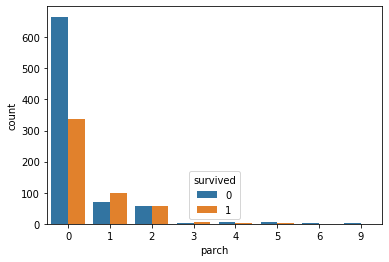

In [7]:
import pandas as pd

titanic_df = pd.read_csv('titanic3.csv')

titanic_df.head()

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # , category=FutureWarning 생략

# 데이터 정보
# Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# survival Survival (0 = No; 1 = Yes)
# name Name
# sex Sex
# age Age
# sibsp Number of Siblings/Spouses Aboard
# parch Number of Parents/Children Aboard
# ticket Ticket Number
# fare Passenger Fare (British pound)
# cabin Cabin
# embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# boat Lifeboat
# body Body Identification Number
# home.dest Home/Destination

titanic_df = pd.read_csv('titanic3.csv')

display(titanic_df.head(),'상단 표 : 기본데이터')
# display(titanic_df.info(),'INFORMATION')
def fillna(df):
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['cabin'].fillna('N', inplace=True)
    df['fare'].fillna(df['fare'].mean(), inplace=True)
    df['embarked'].fillna('N', inplace=True)
    return df

def drop_features(df):
    df.drop(['home.dest','boat','body','name','ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


transform_features(titanic_df) # 메소드 호출 및 실행
f_plot=sns.countplot(x='parch',hue='survived', data=titanic_df)
f_plot
display(titanic_df)